In [15]:
#NSForest (https://github.com/BAevermann/NSForest)
import pandas as pd
import numpy as np
import scanpy as sc


from NSForest_v3dot9_1 import *

In [16]:
data_folder = "/working_dir/objects/snRNA/"
adata = sc.read_h5ad(data_folder + "snRNA_NSForest1.h5ad") #<---

In [17]:
adata

AnnData object with n_obs × n_vars = 105212 × 35158
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rpl', 'percent.rps', 'sample', 'diagnosis', 'sex', 'chemistry', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.6', 'seurat_clusters', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'RNA_snn_res.0.8', 'RNA_snn_res.2.2', 'RNA_snn_res.2', 'cell_clusters', 'celltype_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'harmony', 'umap'

In [18]:
cluster_header = "celltype_clusters" #<---

In [19]:
set(adata.obs[cluster_header])

{'Astro1',
 'Astro2',
 'Endo_Peri',
 'Ex1',
 'Ex10',
 'Ex11',
 'Ex2',
 'Ex3',
 'Ex4',
 'Ex5',
 'Ex6',
 'Ex7',
 'Ex8',
 'Ex9',
 'In1',
 'In2',
 'In3',
 'In4',
 'In5',
 'In6',
 'In7',
 'Micro1',
 'Micro2',
 'OPC',
 'Oligo',
 'Unk'}

In [20]:
NSForest_results = NSForest(adata, cluster_header=cluster_header, n_trees=100, n_genes_eval=6)

Preparing data...
--- 7.337777853012085 seconds ---
Calculating medians...
--- 68.038090467453 seconds ---
Number of clusters to evaluate: 26
1 out of 26:
	Oligo
	['TF']
	0.9417072340268895
2 out of 26:
	Unk
	['GRM4', 'CA10']
	0.7013574660633484
3 out of 26:
	OPC
	['AC004852.2', 'MEGF11']
	0.93113334146639
4 out of 26:
	Astro1
	['GNA14', 'COL5A3']
	0.8032199933608385
5 out of 26:
	Astro2
	['AC012405.1', 'TNC']
	0.7618129218900674
6 out of 26:
	Endo_Peri
	Only 9 out of 15 top Random Forest features with median > 0 will be further evaluated.
	['LEF1']
	0.7225130890052356
7 out of 26:
	Micro1
	['ADAM28']
	0.9270169267970984
8 out of 26:
	Micro2
	Only 9 out of 15 top Random Forest features with median > 0 will be further evaluated.
	['SKAP1']
	0.8069164265129684
9 out of 26:
	Ex1
	['COL5A2', 'AP000829.1']
	0.7867224255096706
10 out of 26:
	Ex2
	['AC021613.1', 'LAMP5']
	0.730965402814478
11 out of 26:
	Ex3
	['ARSJ', 'AC109466.1']
	0.7469537639793021
12 out of 26:
	Ex4
	['AL450352.1', 'GABRG

In [21]:
NSForest_results

,clusterName,f_score,PPV,TN,FP,FN,TP,marker_count,NSForest_markers,binary_genes
0,Oligo,0.941707,0.951709,57841,2077,4361,40933,1,[TF],"[MOG, SLCO1A2, PIEZO2, TF, LINC01608, SLC7A14-..."
1,Unk,0.701357,0.953846,105027,3,120,62,2,"[GRM4, CA10]","[AC073225.1, FAT2, GRM4, CA10, ZNF385D, SLIT3,..."
2,OPC,0.931133,0.992846,96980,44,2082,6106,2,"[AC004852.2, MEGF11]","[BX284613.2, LHFPL3-AS1, AC004852.2, CCDC50, M..."
3,Astro1,0.803220,0.896401,92487,783,5167,6775,2,"[GNA14, COL5A3]","[GNA14, COL5A3, GJA1, FGFR3, PLSCR4, MRVI1, HP..."
4,Astro2,0.761813,0.925946,101174,139,2161,1738,2,"[AC012405.1, TNC]","[AC012405.1, AC073941.1, TNC, WDR49, GALNT15, ..."
5,Endo_Peri,0.722513,0.807018,104604,66,266,276,1,[LEF1],"[CFH, EBF1, LEF1, AC092957.1, NID1, SVIL, LAMA..."
6,Micro1,0.927017,0.959936,99863,176,956,4217,1,[ADAM28],"[CSF2RA, ADAM28, LINC01374, SLCO2B1, A2M, LY86..."
7,Micro2,0.806916,0.875000,105014,16,70,112,1,[SKAP1],"[SKAP1, SLFN12L, SYTL3, ITK, IQGAP2, CD247, CB..."
8,Ex1,0.786722,0.845722,99225,604,2072,3311,2,"[COL5A2, AP000829.1]","[ROS1, CNGB1, AC117453.1, COL5A2, GRB14, AP000..."
9,Ex2,0.730965,0.843318,99781,442,2610,2379,2,"[AC021613.1, LAMP5]","[LINC02306, LINC00507, AC021613.1, PDGFD, LAMP..."


In [22]:
## store cluster-marker information in a dictionary
markers = dict(zip(NSForest_results['clusterName'], NSForest_results['NSForest_markers']))

         Falling back to preprocessing with `sc.pp.pca` and default params.


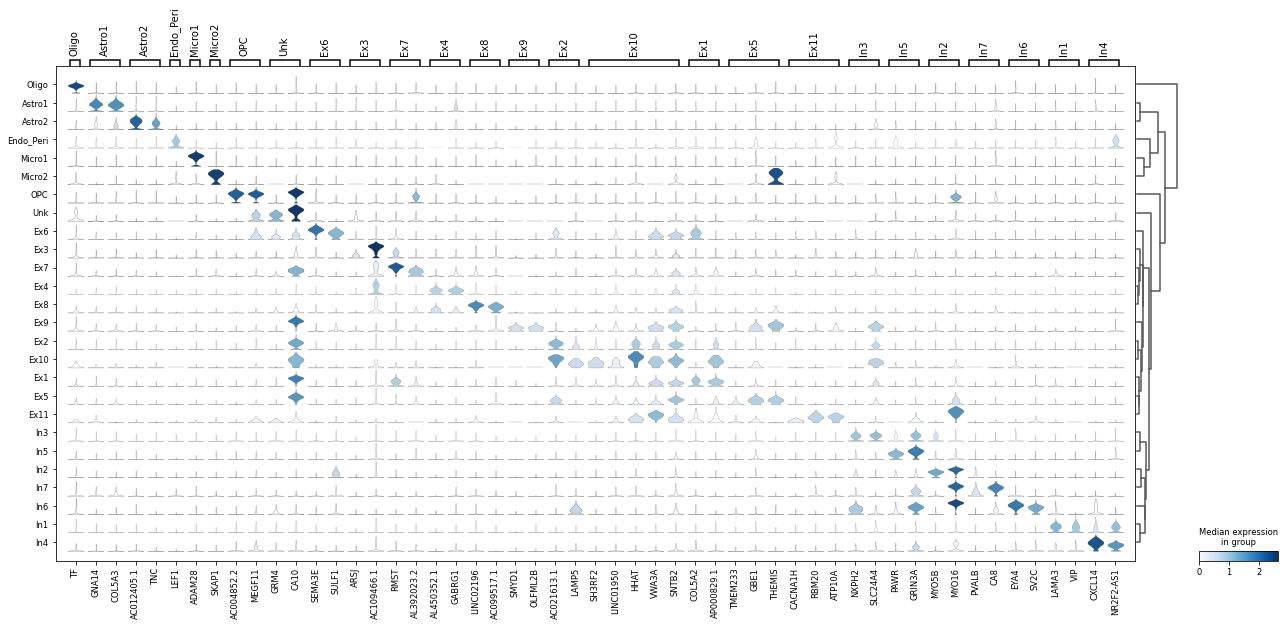

In [23]:
## use scanpy plot function to plot the marker genes
sc.pl.stacked_violin(adata, markers, groupby=cluster_header, dendrogram=True)

In [24]:
binary_genes = dict(zip(NSForest_results['clusterName'], NSForest_results['binary_genes']))

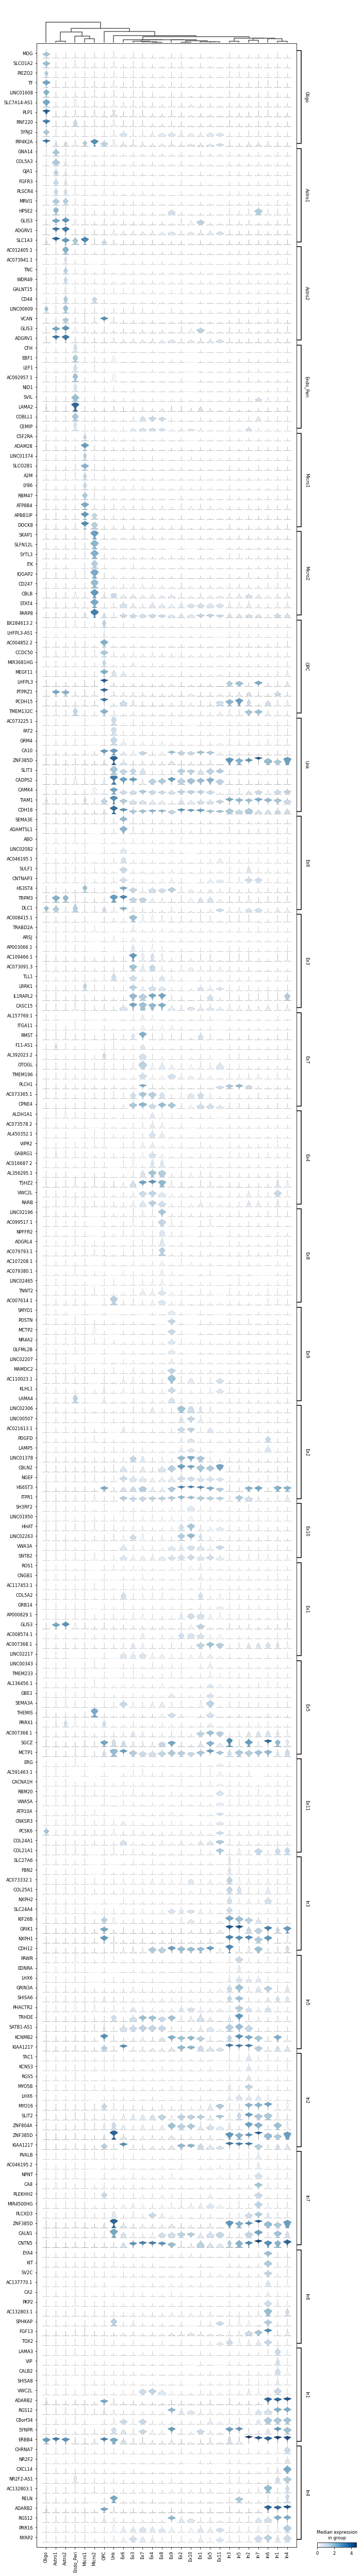

In [25]:
sc.pl.stacked_violin(adata, binary_genes, groupby=cluster_header, dendrogram=True, swap_axes=True)

In [26]:
!jupyter nbconvert --to html round8_NSForest.ipynb #<---

[NbConvertApp] Converting notebook round8_NSForest.ipynb to html
[NbConvertApp] Writing 569426 bytes to round8_NSForest.html


In [27]:
!python3 --version

Python 3.10.6


In [28]:
sc.__version__

'1.9.3'